In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [33]:
data = pd.read_csv("probka.csv")
data.head()

,name,date,open,high,low,close,volume
0,ALIOR,02-01-2015,77.92,78.00,76.58,77.05,68501
1,ALIOR,05-01-2015,76.76,79.80,75.43,75.43,73483
2,ALIOR,07-01-2015,75.63,79.50,75.63,76.30,126594
3,ALIOR,08-01-2015,77.23,79.51,77.01,79.50,317013
4,ALIOR,09-01-2015,79.50,80.25,78.95,79.27,442572


In [11]:
pekao = data.loc[data["name"] == "PEKAO"]
pekao.head()

,name,date,open,high,low,close,volume
14463,PEKAO,02-01-2015,181.70,181.70,177.40,178.1,116176
14464,PEKAO,05-01-2015,178.15,179.85,173.90,173.9,235449
14465,PEKAO,07-01-2015,174.95,176.00,172.85,175.4,1069062
14466,PEKAO,08-01-2015,175.65,178.90,175.65,178.9,777581
14467,PEKAO,09-01-2015,179.00,180.35,175.90,176.5,231744


In [13]:
pekaodf = pekao.copy()
pekaodf["date"] = pd.to_datetime(pekaodf["date"], format = "%d-%m-%Y")
pekaodf.head()

,name,date,open,high,low,close,volume
14463,PEKAO,2015-01-02,181.70,181.70,177.40,178.1,116176
14464,PEKAO,2015-01-05,178.15,179.85,173.90,173.9,235449
14465,PEKAO,2015-01-07,174.95,176.00,172.85,175.4,1069062
14466,PEKAO,2015-01-08,175.65,178.90,175.65,178.9,777581
14467,PEKAO,2015-01-09,179.00,180.35,175.90,176.5,231744


Text(0.5, 1.0, "Alior's Volume History")

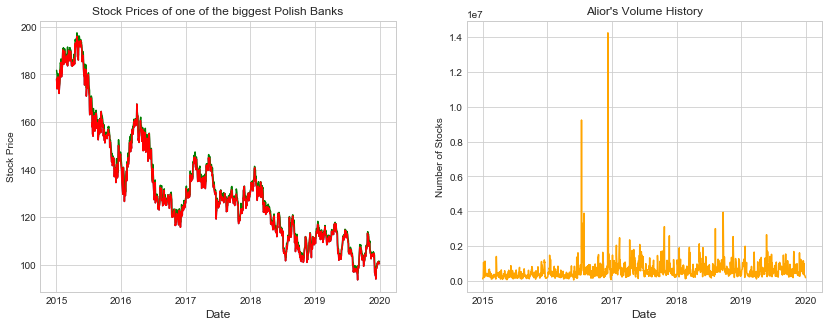

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
ax1.plot(pekaodf["date"], pekaodf["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Stock Prices of one of the biggest Polish Banks")

ax1.plot(pekaodf["date"], pekaodf["high"], color = "g")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Stock Prices of one of the biggest Polish Banks")

ax1.plot(pekaodf["date"], pekaodf["close"], color = "r")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Stock Prices of one of the biggest Polish Banks")

ax2.plot(pekaodf["date"], pekaodf["volume"], color = "orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Number of Stocks")
ax2.set_title("Alior's Volume History")

In [17]:
trace = go.Ohlc(x=pekaodf['date'],
                open=pekaodf['open'],
                high=pekaodf['high'],
                low=pekaodf['low'],
                close=pekaodf['close'],
                increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'PEKAO Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (PLN)'},
    'shapes': [{
        'x0': '2015-05-24', 'x1': '2015-05-24',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Andrzej Duda <br> takes Office'
    }]
}

daten = [trace]

fig = go.Figure(data=daten, layout=layout)
iplot(fig, filename='simple_ohlc')

In [26]:
pekaodf['month_year'] = pd.to_datetime(pekaodf['date']).dt.to_period('M')

last_year = pekaodf.loc[pekaodf['date'].dt.year == 2019]
g = last_year.groupby(["date"])
monthly_averages = g.aggregate({"open": np.mean, "high": np.mean, "low": np.mean, "close":np.mean})
monthly_averages.reset_index(level=0, inplace=True)

monthly_averages.head()

,date,open,high,low,close
0,2019-01-02,109.05,111.40,106.70,111.40
1,2019-01-03,110.90,110.90,108.75,108.90
2,2019-01-04,109.25,111.50,109.10,111.20
3,2019-01-07,111.70,113.40,111.70,113.05
4,2019-01-08,113.40,114.45,112.25,114.00


In [27]:
trace = go.Candlestick(x=monthly_averages['date'],
                       open=monthly_averages['open'].values.tolist(),
                       high=monthly_averages['high'].values.tolist(),
                       low=monthly_averages['low'].values.tolist(),
                       close=monthly_averages['close'].values.tolist(),
                       increasing=dict(line=dict(color= '#58FA58')),
                       decreasing=dict(line=dict(color= '#FA5858')))


layout = {
    'title': 'PEKAO Historical Price <br> <i>A closer look in 2019 </i>',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'}
}


daten = [trace]

fig = go.Figure(data=daten, layout=layout)
iplot(fig, filename='simple_ohlc')

In [30]:
pekaodf['10_d_avg'] = pekaodf.close.rolling(window=10).mean()
pekaodf['50_d_avg'] = pekaodf.close.rolling(window=50).mean()
pekaodf['200_d_avg'] = pekaodf.close.rolling(window=200).mean()
close_p = pekaodf['close'].values.tolist()

ten_d = pekaodf['10_d_avg'].values.tolist()
fifty_d = pekaodf['50_d_avg'].values.tolist()
twoh_d = pekaodf['200_d_avg'].values.tolist()
date = pekaodf['date'].values.tolist()

pekaodf = pekaodf.set_index('date')

In [31]:
fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)

colors = ['#ff4500', '#92a1cf', '#6E6E6E']
avgs = ['10_d_avg', '50_d_avg', '200_d_avg']

for col, c in zip(avgs, colors):
    fig.append_trace({'x': pekaodf.index, 'y': pekaodf[col], 'type': 'scatter', 'name': col, 'line': {'color': c}}, 1, 1)
for col in ['close']:
    fig.append_trace({'x': pekaodf.index, 'y': pekaodf[col], 'type': 'scatter', 'name': 'Closing Price', 'line':{'color': '#01DF3A'}}, 2, 1)
    
fig['layout'].update(height=800,title='Relationship between MAs <br> and Closing Price',
                    paper_bgcolor='#F2DFCE', plot_bgcolor='#F2DFCE')
    
iplot(fig, filename='pandas/mixed-type subplots')